Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
0.9644


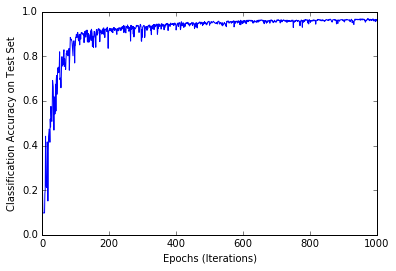

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt

from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

# Import data
from tensorflow.examples.tutorials.mnist import input_data

import tensorflow as tf
import numpy as np

flags = tf.app.flags
FLAGS = flags.FLAGS
flags.DEFINE_string('data_dir', '/tmp/data/', 'Directory for storing data')

mnist = input_data.read_data_sets(FLAGS.data_dir, one_hot=True)

D = 784
H = 175
C = 10

# Create the model
x = tf.placeholder(tf.float32, [None, 784])

w1 = tf.Variable(1e-3 * np.random.randn(D, H).astype(np.float32))
w2 = tf.Variable(1e-3 * np.random.randn(H, C).astype(np.float32))

a = tf.matmul(x, w1)
a_relu = tf.nn.relu(a)
scores = tf.matmul(a_relu, w2)
b = tf.Variable(tf.zeros([10]))
y = tf.nn.softmax(scores + b)

# Define loss and optimizer
step_size = 1.05
y_ = tf.placeholder(tf.float32, [None, 10])
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1]))
train_step = tf.train.GradientDescentOptimizer(step_size).minimize(cross_entropy)



init = tf.initialize_all_variables()
sess = tf.Session()
sess.run(init)

# Train
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
accuracies = []


for i in range(1000):
  batch_xs, batch_ys = mnist.train.next_batch(100)
  sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})
  accuracies.append(sess.run(accuracy, feed_dict={x: mnist.test.images, y_: mnist.test.labels}))

print(sess.run(accuracy, feed_dict={x: mnist.test.images, y_: mnist.test.labels}))
plt.xlabel("Epochs (Iterations)")
plt.ylabel("Classification Accuracy on Test Set")
plt.plot(range(1, 1001), accuracies)
